<a href="https://colab.research.google.com/github/richeym-umich/workshops/blob/main/Machine_Learning_Methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Classification**

The following is an example of a classification application using the K nearest neighbors classifier in the scikit learn package

In [3]:
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier

In [1]:
# Assigning features and label variables
# First Feature
weather=['Sunny','Sunny','Overcast','Rainy','Rainy','Rainy','Overcast','Sunny','Sunny',
'Rainy','Sunny','Overcast','Overcast','Rainy']
# Second Feature
temp=['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild','Mild','Mild','Hot','Mild']

# Label or target varible
play=['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']

In [5]:
#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
weather_encoded=le.fit_transform(weather)
print(weather_encoded)

[2 2 0 1 1 1 0 2 2 1 2 0 0 1]


In [6]:
# converting string labels into numbers
temp_encoded=le.fit_transform(temp)
label=le.fit_transform(play)

In [7]:
#combining weather and temp into single listof tuples
features=list(zip(weather_encoded,temp_encoded))

In [12]:
model = KNeighborsClassifier(n_neighbors=3)

# Train the model using the training sets
model.fit(features,label)

#Predict Output
predicted= model.predict([[0,2]]) # 0:Overcast, 2:Mild
print("Should the team play in these conditions?: " + str(le.inverse_transform(predicted)))

Should the team play in these conditions?: ['Yes']


LabelEncoder()

### **Reinforcement Learning**



The following is an example of a reinforcement learning application. The functions are predefined, and we will step through running each part of the code

In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

First, we define a list of points by their connections

In [ ]:
points_list = [(0,1), (1,5), (5,6), (5,4), (1,2), (2,3), (2,7)]

Next, we add the points to a graph and visualize the graph

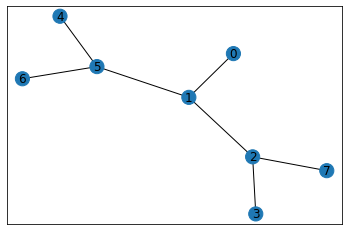

In [ ]:
goal = 7
G = nx.Graph()
G.add_edges_from(points_list)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=[200,200,200,200,200,200,200,200])
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos)
plt.show()

Next, we create our reward matrix

In [ ]:
MATRIX_SIZE = 8

#create matrix x*y
R = np.matrix(np.ones(shape=(MATRIX_SIZE, MATRIX_SIZE)))
R *= -1

#assign zeros to paths and 100 to goal-reaching point
for point in points_list:
    print(point)
    if point[1] == goal:
        R[point] = 100
    else:
        R[point]=0

    if point[0] == goal:
        R[point[::-1]] = 100
    else:
        R[point[::-1]] = 0

R[goal,goal] = 100

Q = np.matrix(np.zeros([MATRIX_SIZE, MATRIX_SIZE]))

(0, 1)
(1, 5)
(5, 6)
(5, 4)
(1, 2)
(2, 3)
(2, 7)


Set our learning parameter

In [ ]:
#learning parameter
gamma = 0.8

Function to find our available actions from our current state

In [ ]:
def available_actions(state):
    current_state_row = R[state,]
    av_act = np.where(current_state_row >= 0)[1]
    return av_act

Function to choose our next action from our current state and available actions

In [ ]:
def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_act, 1))
    return next_action

Function to update the state of our actor with our chosen action

In [ ]:
def update(current_state, action, gamma):
    max_index = np.where(Q[action,] == np.max(Q[action,]))[1]

    if max_index.shape[0] > 1:
        max_index = int(np.random.choice(max_index, size=1))
    else:
        max_index = int(max_index)

    max_value = Q[action, max_index]

    Q[current_state,action] = R[current_state, action] + gamma*max_value

    if(np.max(Q) > 0):
        return(np.sum(Q/np.max(Q)*100))
    else:
        return(0)

Now that our code has been set up, we need to train our reinforcement learning model

In [ ]:
#Training
scores = []
for i in range(700):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_act = available_actions(current_state)
    action = sample_next_action(available_act)
    score = update(current_state,action,gamma)
    scores.append(score)

print("Trained Q matrix: ")
print(Q/np.max(Q)*100)

Trained Q matrix: 
[[  0.          63.99999998   0.           0.           0.
    0.           0.           0.        ]
 [ 51.19999998   0.          79.99999997   0.           0.
   51.19999998   0.           0.        ]
 [  0.          63.99999973   0.          63.99999998   0.
    0.           0.         100.        ]
 [  0.           0.          80.           0.           0.
    0.           0.           0.        ]
 [  0.           0.           0.           0.           0.
   51.19999998   0.           0.        ]
 [  0.          63.99999998   0.           0.          40.95999998
    0.          40.95999998   0.        ]
 [  0.           0.           0.           0.           0.
   51.19999998   0.           0.        ]
 [  0.           0.          79.99999997   0.           0.
    0.           0.          99.99999998]]


Finally, we test our model and output the learning results

Most efficient path: 
[0, 1, 2, 7]


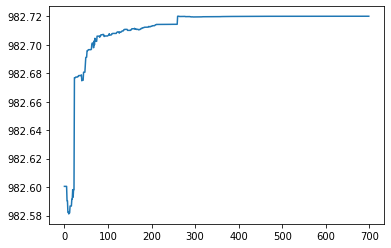

In [ ]:
#Testing
current_state=0
steps = [current_state]

while current_state != 7:
    next_step_index = np.where(Q[current_state,] == np.max(Q[current_state,]))[1]

    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size=1))
    else:
        next_step_index = int(next_step_index)
    steps.append(next_step_index)
    current_state = next_step_index
print("Most efficient path: ")
print(steps)

plt.plot(scores)
plt.show()